In [1]:
import torch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory_train = 'data\\colon_image_sets\\train'
directory_validation = 'data\\colon_image_sets\\val'
directory_testing = 'data\\colon_image_sets\\test'

In [3]:
data_generator = ImageDataGenerator(rescale=1./255.)
h, w = 299, 299
bs_size = 4

train_data = data_generator.flow_from_directory(
    directory_train,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True
)

val_data = data_generator.flow_from_directory(
    directory_validation,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

test_data = data_generator.flow_from_directory(
    directory_testing,
    target_size=(h, w),
    batch_size=bs_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
x, y = next(train_data)
x.shape # input shape of one record is (299, 299,3) , 4: is the batch size

(4, 299, 299, 3)

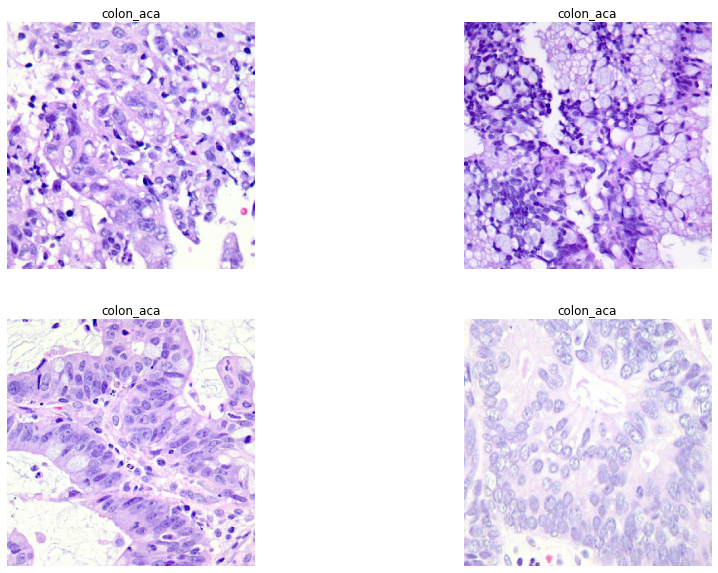

In [5]:
a = train_data.class_indices
class_names = list(a.keys()) # storing class/breed names in a list

def plot_images(img, labels):
    plt.figure(figsize=[15,10])
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x,y)

In [6]:
base_model = tf.keras.applications.InceptionResNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(h, w, 3)    
)

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 55,912,674
Trainable params: 1,575,938
Non-trainable params: 54,336,736
_________________________________________________________________


In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(train_data, validation_data=val_data, epochs=1)

1500/1500 [==============================] - 296s 189ms/step - loss: 0.0607 - accuracy: 0.9795 - val_loss: 0.0088 - val_accuracy: 0.9975


In [9]:
model.evaluate(val_data)

500/500 [==============================] - 67s 134ms/step - loss: 0.0088 - accuracy: 0.9975


[0.00884451624006033, 0.9975000023841858]